## Exercise: Drawing Gravitational Fields

Try to use the [quiver](https://matplotlib.org/stable/plot_types/arrays/quiver.html) plot to show the gravitational forces exerted by a number of planets (in 2D) on a given mass. 

The quiver plot is used to show vector fields, where at each point in a 2D space has a 2D vector associated with it. In this case the vector will be the sum of the force vectors towards each of the planets. You can use [Newton's law](https://en.wikipedia.org/wiki/Newton's_law_of_universal_gravitation) to find the magnitude of the force, and remember the direction of the force should point towards each planet.

I'd also encourage you to try out some more of the plot types in Matplotlib. Start from the documentation for a particular plot, work through the example provided and learn how to format your numpy array data to show an interesting function.

Here are some suggestions to try:
* Try some more of the basic plots [here](https://matplotlib.org/stable/plot_types/basic/index.html)
* The [contour](https://matplotlib.org/stable/plot_types/arrays/contour.html) and [contourf](https://matplotlib.org/stable/plot_types/arrays/contourf.html) plots are alternative ways of showing heightfields. Try using them to plot the sinc function above.
* Once you've completed the Randomness & Probability notebook, try plotting some [box plots](https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py) and [violin plots](https://matplotlib.org/stable/plot_types/stats/violin.html) for some normally distributed data. Then try generating data from a [skewed normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html). How do the plots change?

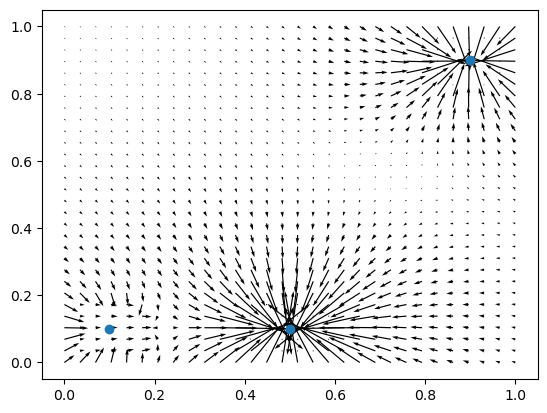

In [30]:
import numpy as np
import matplotlib.pyplot as plt

planet_locations = [[0.1, 0.1], [0.5, 0.1], [0.9, 0.9]]
planet_masses = [1, 5, 3]
my_mass = 0.1
gravitational_constant = 6.674e-11
min_distance = 0.1 # We won't plot forces at points below min_distance from a planet, as they will be very high in value.

# Make x, y coordinates
x_coords = np.linspace(0, 1, 30)
y_coords = np.linspace(0, 1, 30)
x_coords, y_coords = np.meshgrid(x_coords, y_coords)

# Prepare arrays to store force values.
force_x = np.zeros_like(x_coords)
force_y = np.zeros_like(y_coords)

for location, mass in zip(planet_locations, planet_masses):
    # Find distance to planet in x and y directions
    disp_x = location[0] - x_coords
    disp_y = location[1] - y_coords

    # Find distance to planet at each sample location
    distances = np.sqrt(disp_x**2 + disp_y**2)

    # Find normalised direction towards planet
    dir_x = disp_x / distances
    dir_y = disp_y / distances

    # Find magnitude of force using Newton's law
    force_magnitudes = gravitational_constant * my_mass * mass / distances**2
    # Ignore locations very close to a planet, as these will have very high force values.
    force_magnitudes[distances < min_distance] = 0

    # Find final force in x and y directions
    force_x += dir_x * force_magnitudes
    force_y += dir_y * force_magnitudes

fig, ax = plt.subplots()
# Plot force vectors
ax.quiver(x_coords, y_coords, force_x, force_y, scale_units='xy')
# Plot planet locations
ax.scatter([l[0] for l in planet_locations], [l[1] for l in planet_locations])